In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
import numpy as np

warnings.filterwarnings("ignore")


In [196]:
ff5_returns_data_reversed = pd.read_csv("Cleaned_Data/five_ff_cleaned_df.csv")
ff3_returns_data_reversed = pd.read_csv("Cleaned_Data/three_ff_cleaned_df.csv")

ff5_returns_data = ff5_returns_data_reversed[::-1]
ff3_returns_data = ff3_returns_data_reversed[::-1]

ff5_returns_data['Date'] = pd.to_datetime(ff5_returns_data['Date'], format='%d-%m-%Y')
ff3_returns_data['Date'] = pd.to_datetime(ff3_returns_data['Date'], format='%d-%m-%Y')
ff5_returns_data.set_index('Date', inplace=True)
ff3_returns_data.set_index('Date', inplace=True)

ff3_returns_data = ff3_returns_data/100
ff5_returns_data = ff5_returns_data/100


ignore_columns = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']

In [197]:
display(ff5_returns_data.head())
display(ff5_returns_data.tail())

,AAPL.O,NVDA.O,MSFT.O,AMZN.O,LLY,WMT,XOM,MA,UNH,ORCL.K,...,SUNE.O,TCRT.O,WINT.O,DGLY.O,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,,,,,,,,,,,,,,,
2007-02-28,-0.013150,0.011354,-0.091203,0.038281,-0.028678,0.012917,-0.033204,-0.039963,-0.001532,-0.043472,...,0.047101,-0.005644,-0.131825,-0.169076,-0.0196,0.0129,-0.0014,-0.0051,-0.0071,0.0038
2007-03-31,0.093579,-0.074306,-0.010707,0.016471,0.021073,-0.028555,0.051258,-0.008809,0.015026,0.098459,...,-0.019915,-0.036507,0.074433,0.140905,0.0068,0.0020,-0.0097,0.0064,-0.0065,0.0043
2007-04-30,0.071537,0.133488,0.071645,0.432653,0.096139,0.020450,0.050776,0.049937,0.001698,0.036289,...,0.075612,0.047765,0.225672,0.315853,0.0349,-0.0204,-0.0145,0.0115,0.0103,0.0044
2007-05-31,0.194200,0.051812,0.024745,0.119864,-0.008662,-0.006700,0.046640,0.291993,0.031719,0.030385,...,-0.130744,-0.011257,0.132268,-0.004175,0.0324,0.0040,-0.0065,0.0158,-0.0137,0.0041
2007-06-30,0.006981,0.176124,-0.040567,-0.010614,-0.047869,0.010657,0.008501,0.103574,-0.068576,0.016885,...,0.117333,-0.028710,-0.180553,-0.038384,-0.0196,0.0074,-0.0105,0.0053,0.0008,0.0040


,AAPL.O,NVDA.O,MSFT.O,AMZN.O,LLY,WMT,XOM,MA,UNH,ORCL.K,...,SUNE.O,TCRT.O,WINT.O,DGLY.O,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-31,0.030684,0.019883,-0.002897,-0.046413,0.177019,0.117913,-0.005496,0.041461,0.024076,0.013108,...,-0.469044,-0.351255,-0.117372,-0.349376,0.0161,-0.0365,-0.0113,0.0085,0.0086,0.0048
2024-09-30,0.017316,0.017192,0.031061,0.042931,-0.080305,0.044570,-0.006124,0.021410,-0.009397,0.187334,...,-1.763269,0.217723,-1.221805,-0.056089,0.0174,-0.0102,-0.0259,0.0004,-0.0026,0.0040
2024-10-31,-0.030902,0.089123,-0.057268,0.000376,-0.065537,0.014751,-0.003761,0.011657,-0.035124,-0.015137,...,-0.531673,-0.451542,-1.223123,-0.101096,-0.0097,-0.0088,0.0089,-0.0138,0.0103,0.0039
2024-11-30,0.049315,0.040521,0.041244,0.109114,-0.042330,0.121099,0.010054,0.064621,0.077846,0.096479,...,-0.204910,0.229950,-0.282106,-0.186586,0.0651,0.0478,-0.0005,-0.0262,-0.0217,0.0040
2024-12-31,0.053688,-0.029062,-0.004639,0.053842,-0.029798,-0.023518,-0.092204,-0.012025,-0.187527,-0.103655,...,-0.199287,-0.303307,-0.417889,-0.395324,-0.0317,-0.0387,-0.0295,0.0182,-0.0110,0.0037


In [198]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress UserWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)  # Suppress ConvergenceWarnings

parameters = [[1, 1], [1, 2], [2, 1], [2, 2]]

# Dictionaries to store the best and second-best models for each stock
best_models = {}
count_model_aic = {}  # Count how many times each model is selected as the best
count_model_bic = {}  # Count how many times each model is selected as the best
second_best_count_model_aic = {}  # Count how many times each model is selected as the second-best
second_best_count_model_bic = {}  # Count how many times each model is selected as the second-best

for col in ff5_returns_data.columns:
    if col not in ignore_columns:

        # Initialize variables to track the best and second-best models
        min_aic = float('inf')
        second_min_aic = float('inf')
        min_bic = float('inf')
        second_min_bic = float('inf')
        best_model_name_bic = None
        second_best_model_name_bic = None
        best_model_name_aic = None
        second_best_model_name_aic = None

        for p, q in parameters:
            try:
                # Fit GARCH model
                model = arch_model(ff5_returns_data[col], vol='Garch', p=p, q=q, dist='t')
                result = model.fit(disp='off', options={'maxiter': 2000})
                current_aic = result.aic

                # Update best and second-best AIC values
                if current_aic < min_aic:
                    second_min_aic = min_aic
                    second_best_model_name = best_model_name_aic
                    min_aic = current_aic
                    best_model_name_aic = f"GARCH({p},{q})"
                elif current_aic < second_min_aic:
                    second_min_aic = current_aic
                    second_best_model_name_aic = f"GARCH({p},{q})"
                    
                # Update best and second-best BIC values
                current_bic = result.bic
                if current_bic < min_bic:
                    second_min_bic = min_bic
                    second_best_model_name_bic = best_model_name_bic
                    min_bic = current_bic
                    best_model_name_bic = f"GARCH({p},{q})"
                elif current_bic < second_min_bic:
                    second_min_bic = current_bic
                    second_best_model_name_bic = f"GARCH({p},{q})"

                # Fit EGARCH model
                model2 = arch_model(ff3_returns_data[col], vol='EGARCH', p=p, q=q, dist='t')
                result2 = model2.fit(disp='off', options={'maxiter': 2000})
                current_aic = result2.aic

                if current_aic < min_aic:
                    second_min_aic = min_aic
                    second_best_model_name_aic = best_model_name_aic
                    min_aic = current_aic
                    best_model_name_aic = f"EGARCH({p},{q})"
                elif current_aic < second_min_aic:
                    second_min_aic = current_aic
                    second_best_model_name_aic = f"EGARCH({p},{q})"
                    
                # Update best and second-best BIC values
                current_bic = result2.bic
                if current_bic < min_bic:
                    second_min_bic = min_bic
                    second_best_model_name_bic = best_model_name_bic
                    min_bic = current_bic
                    best_model_name_bic = f"EGARCH({p},{q})"
                elif current_bic < second_min_bic:
                    second_min_bic = current_bic
                    second_best_model_name_bic = f"EGARCH({p},{q})"

                # Fit HARCH model
                model3 = arch_model(ff3_returns_data[col], vol='HARCH', p=p, q=q, dist='t')
                result3 = model3.fit(disp='off', options={'maxiter': 2000})
                current_aic = result3.aic

                if current_aic < min_aic:
                    second_min_aic = min_aic
                    second_best_model_name = best_model_name_aic
                    min_aic = current_aic
                    best_model_name_aic = f"HARCH({p},{q})"
                elif current_aic < second_min_aic:
                    second_min_aic = current_aic
                    second_best_model_name_aic = f"HARCH({p},{q})"
                    
                # Update best and second-best BIC values
                current_bic = result3.bic
                if current_bic < min_bic:
                    second_min_bic = min_bic
                    second_best_model_name_bic = best_model_name_bic
                    min_bic = current_bic
                    best_model_name_bic = f"HARCH({p},{q})"
                elif current_bic < second_min_bic:
                    second_min_bic = current_bic
                    second_best_model_name_bic = f"HARCH({p},{q})"

                # Fit FIGARCH model (only for p=1, q=1)
                if p == 1 and q == 1:
                    model4 = arch_model(ff3_returns_data[col], vol='FIGARCH', p=p, q=q, dist='t')
                    result4 = model4.fit(disp='off', options={'maxiter': 2000})
                    current_aic = result4.aic

                    if current_aic < min_aic:
                        second_min_aic = min_aic
                        second_best_model_name = best_model_name_aic
                        min_aic = current_aic
                        best_model_name_aic = f"FIGARCH({p},{q})"
                    elif current_aic < second_min_aic:
                        second_min_aic = current_aic
                        second_best_model_name_aic = f"FIGARCH({p},{q})"
                        
                    # Update best and second-best BIC values
                    current_bic = result4.bic
                    if current_bic < min_bic:
                        second_min_bic = min_bic
                        second_best_model_name_bic = best_model_name_bic
                        min_bic = current_bic
                        best_model_name_bic = f"FIGARCH({p},{q})"
                    elif current_bic < second_min_bic:
                        second_min_bic = current_bic
                        second_best_model_name_bic = f"FIGARCH({p},{q})"

            except Exception as e:
                print(f"Error fitting model for {col} with p={p}, q={q}: {e}")

        # Store the best and second-best models for the stock
        best_models[col] = {
            "best_model_aic": (best_model_name_aic, min_aic),
            "second_best_model_aic": (second_best_model_name_aic, second_min_aic),
            "best_model_bic": (best_model_name_bic, min_bic),
            "second_best_model_bic": (second_best_model_name_bic, second_min_bic)
        }

        # Update counts for the best model
        if best_model_name_aic not in count_model_aic:
            count_model_aic[best_model_name_aic] = 1
        else:
            count_model_aic[best_model_name_aic] += 1

        # Update counts for the second-best model
        if second_best_model_name_aic not in second_best_count_model_aic:
            second_best_count_model_aic[second_best_model_name_aic] = 1
        else:
            second_best_count_model_aic[second_best_model_name_aic] += 1
            
        # Update counts for the best model BIC
        if best_model_name_bic not in count_model_bic:
            count_model_bic[best_model_name_bic] = 1
        else:
            count_model_bic[best_model_name_bic] += 1
            
        # Update counts for the second-best model BIC
        if second_best_model_name_bic not in second_best_count_model_bic:
            second_best_count_model_bic[second_best_model_name_bic] = 1
        else:
            second_best_count_model_bic[second_best_model_name_bic] += 1

c:\Users\saiki\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\saiki\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\saiki\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\saiki\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\saiki\anaconda3\Lib\site-pac

In [199]:
# Print the best and second-best models for each stock
# print("\nSummary of Best and Second-Best Models:")
for stock, models in best_models.items():
    best_model_name_aic, best_aic = models["best_model_aic"]
    second_best_model_name_aic, second_best_aic = models["second_best_model_aic"]
    
    best_model_name_bic, best_bic = models["best_model_bic"]
    second_best_model_name_bic, second_best_bic = models["second_best_model_bic"]
    # print(f"{stock}: Best Model (AIC): {best_model_name_aic} (AIC={best_aic}), Second-Best Model (AIC): {second_best_model_name_aic} (AIC={second_best_aic})")

# Print the counts for the best and second-best models
print("\nCount of Best Models (AIC):")
for model, count in count_model_aic.items():
    print(f"{model}: {count}")

print("\nCount of Second-Best Models (AIC):")
for model, count in second_best_count_model_aic.items():
    print(f"{model}: {count}")
    
print("\nCount of Best Models (BIC):")
for model, count in count_model_bic.items():
    print(f"{model}: {count}")

print("\nCount of Second-Best Models (BIC):")
for model, count in second_best_count_model_aic.items():
    print(f"{model}: {count}")


Count of Best Models (AIC):
EGARCH(1,1): 252
EGARCH(2,1): 113
GARCH(1,1): 269
GARCH(1,2): 44
GARCH(2,1): 20
EGARCH(1,2): 75
HARCH(1,1): 105
EGARCH(2,2): 58
HARCH(2,1): 25
FIGARCH(1,1): 8
GARCH(2,2): 6

Count of Second-Best Models (AIC):
GARCH(1,1): 133
EGARCH(2,1): 106
EGARCH(1,1): 235
EGARCH(2,2): 72
GARCH(2,2): 15
EGARCH(1,2): 77
GARCH(2,1): 41
HARCH(1,2): 105
HARCH(1,1): 56
GARCH(1,2): 70
FIGARCH(1,1): 23
HARCH(2,1): 17
HARCH(2,2): 25

Count of Best Models (BIC):
EGARCH(1,1): 269
EGARCH(2,1): 39
GARCH(1,1): 263
HARCH(1,1): 330
EGARCH(1,2): 36
HARCH(2,1): 15
EGARCH(2,2): 18
GARCH(2,1): 4
GARCH(1,2): 1

Count of Second-Best Models (BIC):
GARCH(1,1): 133
EGARCH(2,1): 106
EGARCH(1,1): 235
EGARCH(2,2): 72
GARCH(2,2): 15
EGARCH(1,2): 77
GARCH(2,1): 41
HARCH(1,2): 105
HARCH(1,1): 56
GARCH(1,2): 70
FIGARCH(1,1): 23
HARCH(2,1): 17
HARCH(2,2): 25


In [200]:
# Assuming ff5_returns_data is a DataFrame with datetime index and returns data
# train_size, val_size, and test_size are given
train_size = 203
test_size = 12

# Rolling forecast with EGARCH(1,1)
forecast_horizon = 1  # Forecast one step ahead

volatility_forecast_df = pd.DataFrame({
    "Date": pd.date_range(start="2024-01-31", end="2024-12-31", freq="M"),
    })

returns_forecast_df = pd.DataFrame({
    "Date": pd.date_range(start="2024-01-31", end="2024-12-31", freq="M"),
})

volatility_forecast_df.set_index('Date', inplace=True)
returns_forecast_df.set_index('Date', inplace=True)

for col in ff5_returns_data.columns:
    if col not in ignore_columns:
        
        # Initialize rolling forecast
        train_end = train_size
        test_end = train_size + test_size
        
        volatility_forecasts = []
        returns_forecasts = []
        
        while train_end < test_end:
            # Split data into train and test
            train_data = ff5_returns_data[col].iloc[:train_end]
            test_data = ff5_returns_data[col].iloc[train_end:train_end + forecast_horizon]
            
            # Fit EGARCH(1,1) model
            model = arch_model(train_data, vol='EGARCH', p=1, q=1, dist='t')
            result = model.fit(disp='off', options={'maxiter': 2000})
            
            # Forecast
            forecast = result.forecast(horizon=forecast_horizon)
            volatility_forecast = forecast.variance.iloc[-1].values[0] ** 0.5
            mean_forecast = forecast.mean.iloc[-1].values[0]
            
            
            volatility_forecasts.append(volatility_forecast)
            
            returns_forecasts.append(mean_forecast)
            
            # Update train_end for rolling forecast
            train_end += forecast_horizon
        
        median_vol_forecast = np.median(volatility_forecasts)
        median_ret_forecast = np.median(returns_forecasts)
        # Clip the forecasts to avoid extreme values 
        returns_forecasts = np.clip(returns_forecasts, -5 * median_ret_forecast, 5 * median_ret_forecast)
        volatility_forecasts = np.clip(volatility_forecasts, -5 * median_vol_forecast , 5 * median_vol_forecast)
        volatility_forecast_df[col] = volatility_forecasts
        returns_forecast_df[col] = returns_forecasts
       

c:\Users\saiki\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\saiki\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\saiki\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\saiki\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\saiki\anaconda3\Lib\site-packages\arch\univariate\base.py:768: 

In [201]:
# Initialize a Dict to store RMSE values for each stock
rmse_dict = {}

# Calculate RMSE for each stock
for col in returns_forecast_df.columns:
    if col in ff5_returns_data.columns:
        # Get actual and forecasted returns for the test period
        actual_returns = ff5_returns_data[col].iloc[train_size:train_size + test_size]
        forecasted_returns = returns_forecast_df[col]
        
        # Ensure alignment of indices
        actual_returns = actual_returns.loc[forecasted_returns.index]
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(actual_returns, forecasted_returns))
        
        # Store RMSE in the DataFrame
        rmse_dict[col] = rmse
        
# Convert the dictionary to a DataFrame
rmse_df = pd.DataFrame(list(rmse_dict.items()), columns=['Company', 'RMSE']).set_index('Company')

# Display the resulting DataFrame
display(rmse_df)

,RMSE
Company,
AAPL.O,0.052369
NVDA.O,0.119535
MSFT.O,0.055867
AMZN.O,0.099550
LLY,0.092018
...,...
AWH.O,0.235978
SUNE.O,0.864479
TCRT.O,0.394666


In [202]:
display(volatility_forecast_df.head())

,AAPL.O,NVDA.O,MSFT.O,AMZN.O,LLY,WMT,XOM,MA,UNH,ORCL.K,...,PRSO.O,PALI.O,APDN.O,SBET.O,ASTI.O,AWH.O,SUNE.O,TCRT.O,WINT.O,DGLY.O
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-31,0.079425,0.138214,6.985102e-02,0.413488,0.069727,0.086811,0.079647,0.065208,0.059223,0.087122,...,0.409452,9.468026e-01,0.333173,0.305210,0.460400,1.013053,0.113434,0.336238,0.238980,0.227016
2024-02-29,0.079730,0.151739,3.129192e-01,0.088422,0.075798,0.169726,0.075694,0.062119,0.059166,0.084252,...,0.456231,0.000000e+00,0.261987,0.410591,0.399197,1.037117,0.180447,0.489546,0.236484,0.197548
2024-03-31,0.078278,0.167852,6.238551e-02,0.076974,0.090286,0.164138,0.070995,0.059728,0.060049,0.078228,...,0.571462,3.131366e-01,0.247100,0.204484,0.545106,1.021400,2.609227,0.431270,0.239043,0.200780
2024-04-30,0.079221,0.162230,1.371794e-10,0.413488,0.080036,0.109643,0.076755,0.054328,0.056019,0.082478,...,0.524951,9.218040e-08,0.321142,0.236777,0.428287,0.979296,0.000000,0.382309,0.244103,0.216041
2024-05-31,0.076911,0.153254,6.528712e-02,0.094213,0.070164,0.088824,0.072373,0.063023,0.055471,0.086066,...,0.490451,1.373997e+00,0.467042,0.333241,1.306680,0.919213,0.146492,0.384949,0.243869,0.217268


In [203]:
display(returns_forecast_df.head())

,AAPL.O,NVDA.O,MSFT.O,AMZN.O,LLY,WMT,XOM,MA,UNH,ORCL.K,...,PRSO.O,PALI.O,APDN.O,SBET.O,ASTI.O,AWH.O,SUNE.O,TCRT.O,WINT.O,DGLY.O
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-31,0.022951,0.025433,0.014561,-0.110428,0.011435,0.007213,0.001780,0.022797,0.016791,0.008383,...,-0.143852,-0.188105,-0.238204,-0.117685,-0.599374,-0.264182,-0.03246,-0.100576,-0.287321,-0.166012
2024-02-29,0.022486,0.025848,-0.060440,0.021631,0.011717,0.007271,0.001875,0.023114,0.016522,0.008270,...,-0.143852,-0.188105,-0.238204,-0.117685,-0.599374,-0.264182,-0.03246,-0.100576,-0.287321,-0.166012
2024-03-31,0.022203,0.026149,0.015960,0.021560,0.011915,0.009763,0.001953,0.023487,0.016221,0.008489,...,-0.143852,-0.188105,-0.238204,-0.117685,-0.599374,-0.264182,-0.03246,-0.100576,-0.287321,-0.166012
2024-04-30,0.021591,0.026972,0.007526,0.038281,0.012011,0.007742,0.002226,0.023668,0.016104,0.008676,...,-0.143852,-0.188105,-0.238204,-0.117685,-0.599374,-0.264182,-0.03246,-0.100576,-0.287321,-0.166012
2024-05-31,0.021393,0.026521,0.015170,0.023858,0.012057,0.007617,0.002340,0.022598,0.015817,0.008514,...,-0.143852,-0.188105,-0.238204,-0.117685,-0.599374,-0.264182,-0.03246,-0.100576,-0.287321,-0.166012


In [204]:
volatility_forecast_df.to_csv("Cleaned_Data/volatility_forecast_df.csv", index=True)
returns_forecast_df.to_csv("Cleaned_Data/returns_forecast_df.csv", index=True)
rmse_df.to_csv("Cleaned_Data/EGARCH_RMSE.csv", index=True)

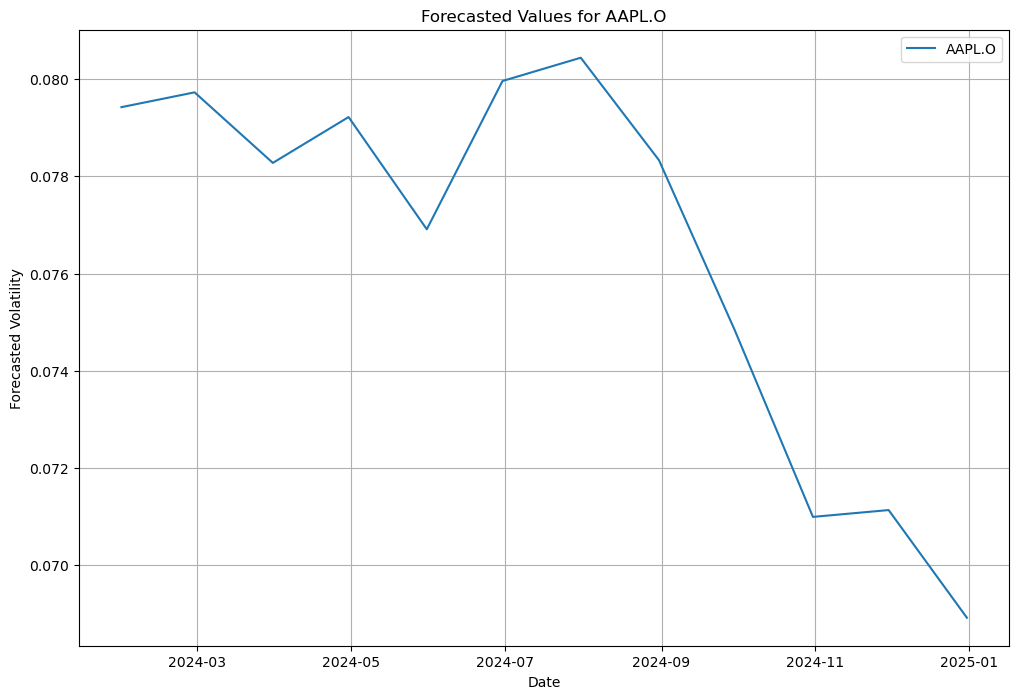

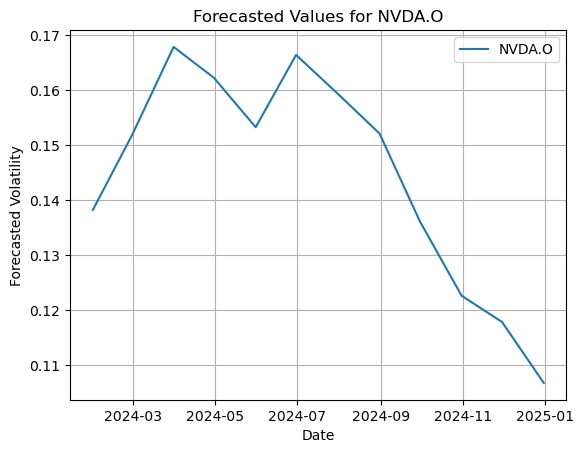

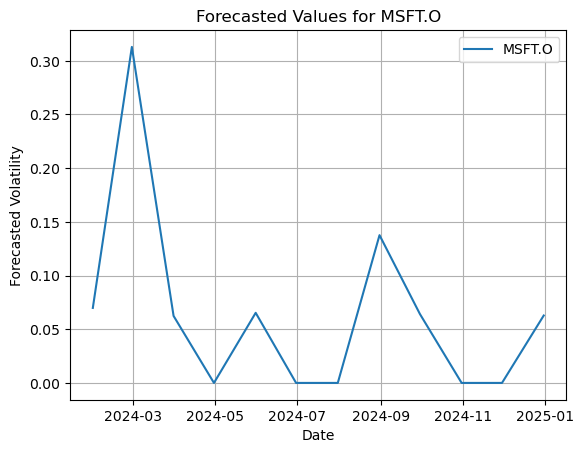

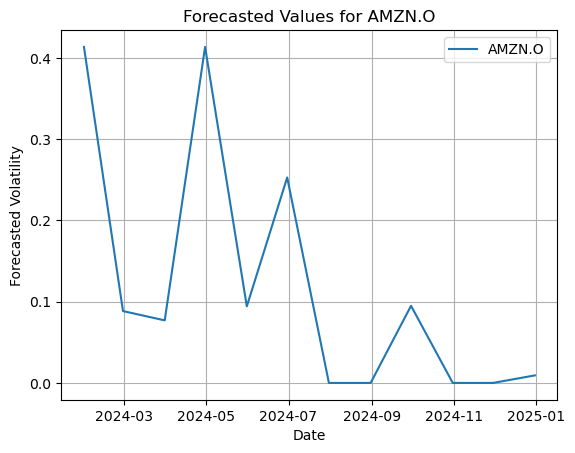

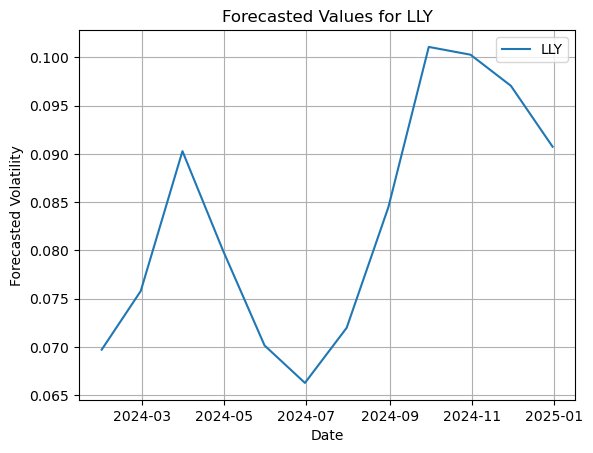

In [205]:
# Plotting the forecasted values for 5 stocks
count = 0
plt.figure(figsize=(12, 8))
for col in volatility_forecast_df.columns:
    if col not in ignore_columns and count < 5:
        plt.plot(volatility_forecast_df.index, volatility_forecast_df[col], label=col)
        plt.title(f"Forecasted Values for {col}")
        plt.xlabel("Date")
        plt.ylabel("Forecasted Volatility")
        plt.legend()
        plt.grid()
        plt.show()
        count += 1

In [206]:
merged_df = pd.read_csv("Cleaned_Data/merged_data.csv")

display(merged_df.head())

# Drop rows to keep only the first occurrence of each unique company (based on 'RIC')
unique_companies_df = merged_df.drop_duplicates(subset='RIC')

# Display the resulting DataFrame
display(unique_companies_df)

,Unnamed: 0,Period,RIC,Closing Price,SIC Industry Code,SIC Industry Name,Company Market Cap,Industry
0,0,2025-01-31,AAPL.O,236.00,3571.0,Electronic Computers,3.210436e+12,Hi-Tech
1,1,2024-12-31,AAPL.O,250.42,3571.0,Electronic Computers,3.210436e+12,Hi-Tech
2,2,2024-11-30,AAPL.O,237.33,3571.0,Electronic Computers,3.210436e+12,Hi-Tech
3,3,2024-10-31,AAPL.O,225.91,3571.0,Electronic Computers,3.210436e+12,Hi-Tech
4,4,2024-09-30,AAPL.O,233.00,3571.0,Electronic Computers,3.210436e+12,Hi-Tech


,Unnamed: 0,Period,RIC,Closing Price,SIC Industry Code,SIC Industry Name,Company Market Cap,Industry
0,0,2025-01-31,AAPL.O,236.0000,3571.0,Electronic Computers,3.210436e+12,Hi-Tech
217,217,2025-01-31,NVDA.O,120.0700,3674.0,Semiconductors and Related Devices,2.968748e+12,Hi-Tech
434,434,2025-01-31,MSFT.O,415.0600,7372.0,Prepackaged Software,2.888548e+12,Hi-Tech
651,651,2025-01-31,AMZN.O,237.6800,5961.0,Catalog and Mail- Order houses,2.097821e+12,Consumer
868,868,2025-01-31,LLY,811.0800,2834.0,Pharmaceutical Preparations,7.713173e+11,Healthcare
...,...,...,...,...,...,...,...,...
210490,210490,2025-01-31,AWH.O,0.3771,2835.0,In Vitro and In Vivo Diagnostic Substances,2.333416e+06,Healthcare
210707,210707,2025-01-31,SUNE.O,1.8400,3661.0,Telephone and Telegraph Apparatus,2.306633e+06,Hi-Tech
210924,210924,2025-01-31,TCRT.O,1.7000,2834.0,Pharmaceutical Preparations,2.289950e+06,Healthcare
211141,211141,2025-01-31,WINT.O,6.5300,2836.0,"Biological Products, Except Diagnostic Substances",1.435916e+06,Healthcare


In [207]:
avg_vol_ind = {}
avg_vol_ind_count = {}
avg_rmse_ind = {}

for col in volatility_forecast_df.columns:
    if col not in ignore_columns:
        sic = merged_df.loc[merged_df['RIC'] == col, 'Industry'].values[0]
        # Check if the SIC code is already in the dictionary
        if sic not in avg_vol_ind.keys():
            avg_vol_ind[sic] = volatility_forecast_df[col].mean()
            avg_rmse_ind[sic] = rmse_df['RMSE'][col]
            avg_vol_ind_count[sic] = 1
        else:
            avg_vol_ind[sic] += volatility_forecast_df[col].mean()
            avg_rmse_ind[sic] += rmse_df['RMSE'][col]
            avg_vol_ind_count[sic] += 1
            
# Calculate the average volatility for each SIC code
for sic in avg_vol_ind.keys():
    avg_vol_ind[sic] /= avg_vol_ind_count[sic]
    avg_rmse_ind[sic] /= avg_vol_ind_count[sic]    

    
# Convert the dictionary to a DataFrame for better visualization
avg_vol_ind_df = pd.DataFrame(list(avg_vol_ind.items()), columns=['SIC', 'Average Volatility'])
avg_vol_ind_df.sort_values(by='Average Volatility', ascending=False, inplace=True)

# Convert the dictionary to a DataFrame for RMSE
avg_rmse_ind_df = pd.DataFrame(list(avg_rmse_ind.items()), columns=['SIC', 'Average RMSE'])

# Display the DataFrame
display(avg_vol_ind_df)

display(avg_rmse_ind_df)

,SIC,Average Volatility
2,Healthcare,0.284585
0,Hi-Tech,0.195937
1,Consumer,0.153749
4,Other,0.152532
3,Manufacturing,0.132642


,SIC,Average RMSE
0,Hi-Tech,0.153988
1,Consumer,0.119088
2,Healthcare,0.185165
3,Manufacturing,0.103828
4,Other,0.107701


In [220]:
avg_vol_ind_df.to_excel("Cleaned_Data/average_volatility_industry.xlsx", index=True)
avg_rmse_ind_df.to_excel("Cleaned_Data/average_rmse_industry.xlsx", index=True)


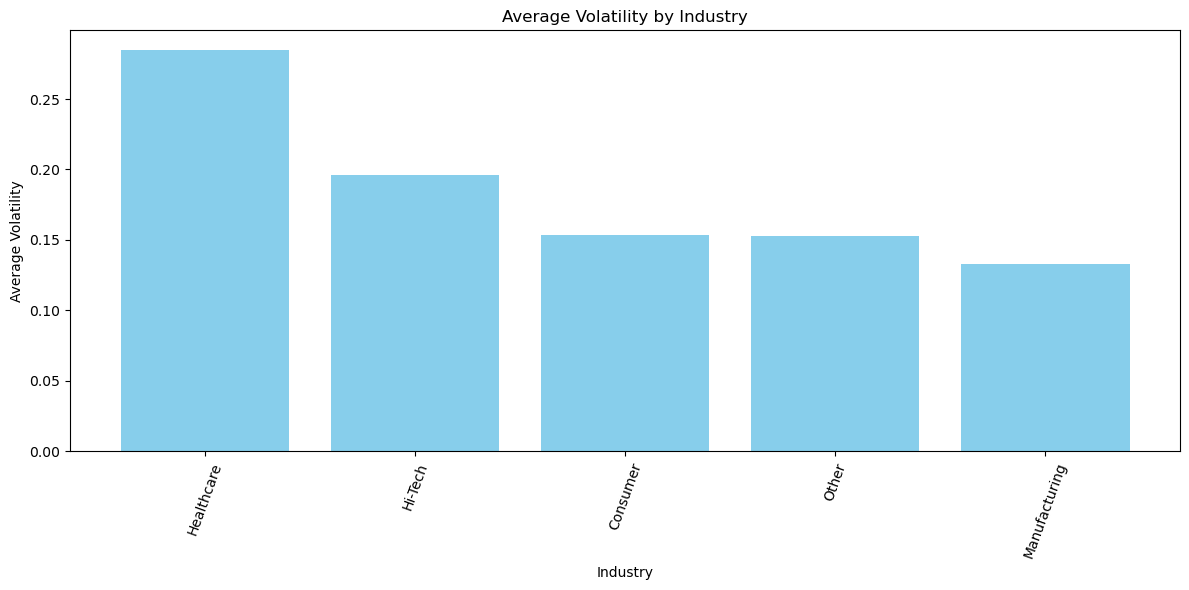

In [208]:
# Plot the average volatility by industry
plt.figure(figsize=(12, 6))
plt.bar(avg_vol_ind_df['SIC'].astype(str), avg_vol_ind_df['Average Volatility'], color='skyblue')
plt.xticks(rotation=70)
plt.xlabel('Industry')
plt.ylabel('Average Volatility')
plt.title('Average Volatility by Industry')
plt.tight_layout()
plt.show()

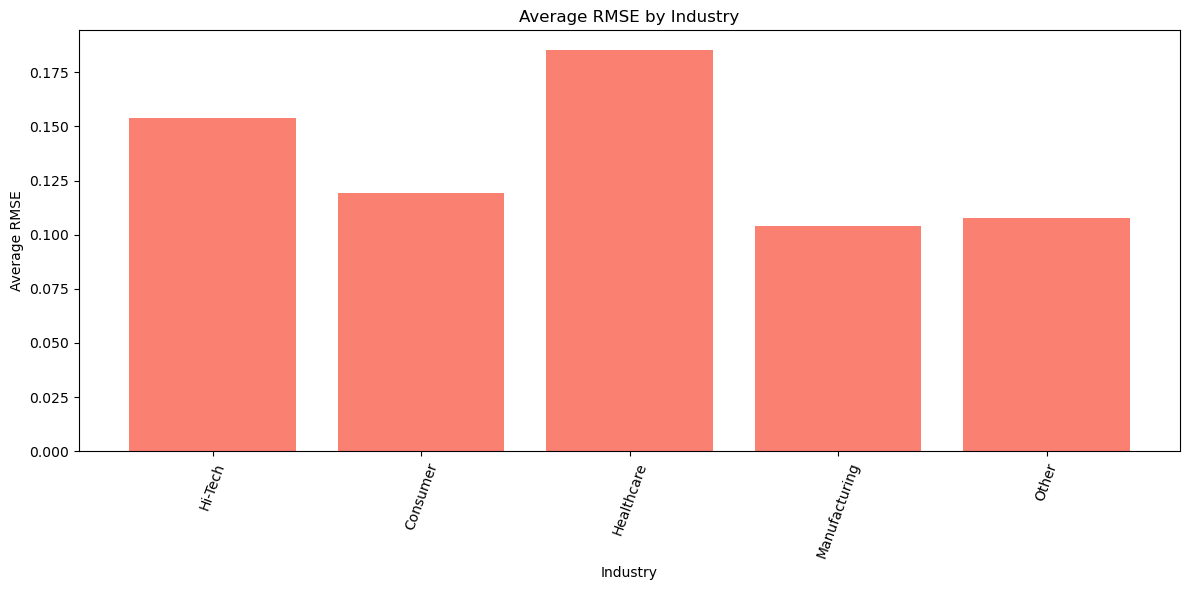

In [209]:
# Plot the average RMSE by the industry

plt.figure(figsize=(12, 6))
plt.bar(avg_rmse_ind_df['SIC'].astype(str), avg_rmse_ind_df['Average RMSE'], color='salmon')
plt.xticks(rotation=70)
plt.xlabel('Industry')
plt.ylabel('Average RMSE')
plt.title('Average RMSE by Industry')
plt.tight_layout()
plt.show()


In [210]:
# Calculate median for each SIC code
avg_vol_ind_median = {}
avg_vol_ind_median_count = {}

for col in volatility_forecast_df.columns:
    if col not in ignore_columns:
        sic = merged_df.loc[merged_df['RIC'] == col, 'Industry'].values[0]
        # Check if the SIC code is already in the dictionary
        if sic not in avg_vol_ind_median.keys():
            avg_vol_ind_median[sic] = volatility_forecast_df[col].median()
            avg_vol_ind_median_count[sic] = 1
        else:
            avg_vol_ind_median[sic] += volatility_forecast_df[col].median()
            avg_vol_ind_median_count[sic] += 1

In [211]:
display(avg_vol_ind_median)

{'Hi-Tech': 43.04614617164727,
 'Consumer': 20.512597885613072,
 'Healthcare': 45.925262296857376,
 'Manufacturing': 23.085735271262642,
 'Other': 28.26573340438654}

In [212]:
# Step 1: Categorize Market Cap
def categorize_market_cap(value):
    if value >= 10_000_000_000:
        return 'Large Cap'
    elif value >= 2_000_000_000:
        return 'Mid Cap'
    elif value >= 300_000_000:
        return 'Small Cap'
    else:
        return 'Micro Cap'  # Optional catch-all

In [213]:
# Average volatility and RMSE by market cap
avg_vol_market_cap = {}
avg_vol_market_cap_count = {}
avg_rmse_market_cap = {}
avg_rmse_market_cap_count = {}

for col in volatility_forecast_df.columns:
    if col not in ignore_columns:
        market_cap = merged_df.loc[merged_df['RIC'] == col, 'Company Market Cap'].values[0]
        market_cap_category = categorize_market_cap(market_cap)
        
        # Check if the market cap category is already in the dictionary
        if market_cap_category not in avg_vol_market_cap.keys():
            avg_vol_market_cap[market_cap_category] = volatility_forecast_df[col].mean()
            avg_rmse_market_cap[market_cap_category] = rmse_df['RMSE'][col]
            avg_vol_market_cap_count[market_cap_category] = 1
            avg_rmse_market_cap_count[market_cap_category] = 1
            
        else:
            avg_vol_market_cap[market_cap_category] += volatility_forecast_df[col].mean()
            avg_rmse_market_cap[market_cap_category] += rmse_df['RMSE'][col]
            avg_vol_market_cap_count[market_cap_category] += 1
            avg_rmse_market_cap_count[market_cap_category] += 1
            
# Calculate the average volatility for each market cap category
for category in avg_vol_market_cap.keys():
    avg_vol_market_cap[category] /= avg_vol_market_cap_count[category]
    avg_rmse_market_cap[category] /= avg_rmse_market_cap_count[category]
    
# Convert the dictionary to a DataFrame for better visualization
avg_vol_market_cap_df = pd.DataFrame(list(avg_vol_market_cap.items()), columns=['Market Cap', 'Average Volatility'])
avg_vol_market_cap_df.sort_values(by='Average Volatility', ascending=False, inplace=True)

# Convert the dictionary to a DataFrame for RMSE
avg_rmse_market_cap_df = pd.DataFrame(list(avg_rmse_market_cap.items()), columns=['Market Cap', 'Average RMSE'])

In [214]:
# Display the DataFrame
display(avg_vol_market_cap_df)
display(avg_rmse_market_cap_df)

,Market Cap,Average Volatility
3,Micro Cap,0.280054
2,Small Cap,0.171035
1,Mid Cap,0.147920
0,Large Cap,0.109682


,Market Cap,Average RMSE
0,Large Cap,0.078730
1,Mid Cap,0.101900
2,Small Cap,0.131061
3,Micro Cap,0.205486


In [ ]:
avg_vol_market_cap_df.to_excel("Cleaned_Data/average_volatility_market_cap.xlsx", index=True)
avg_rmse_market_cap_df.to_excel("Cleaned_Data/average_rmse_market_cap.xlsx", index=True)

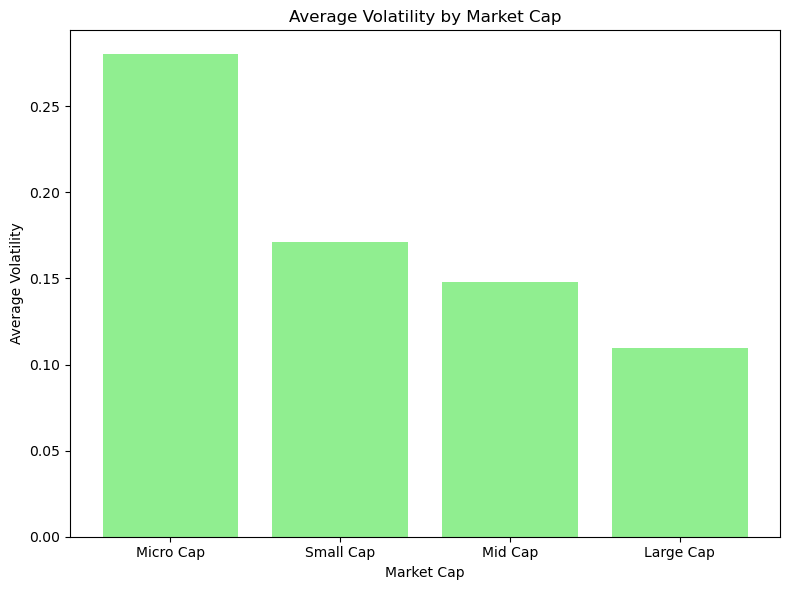

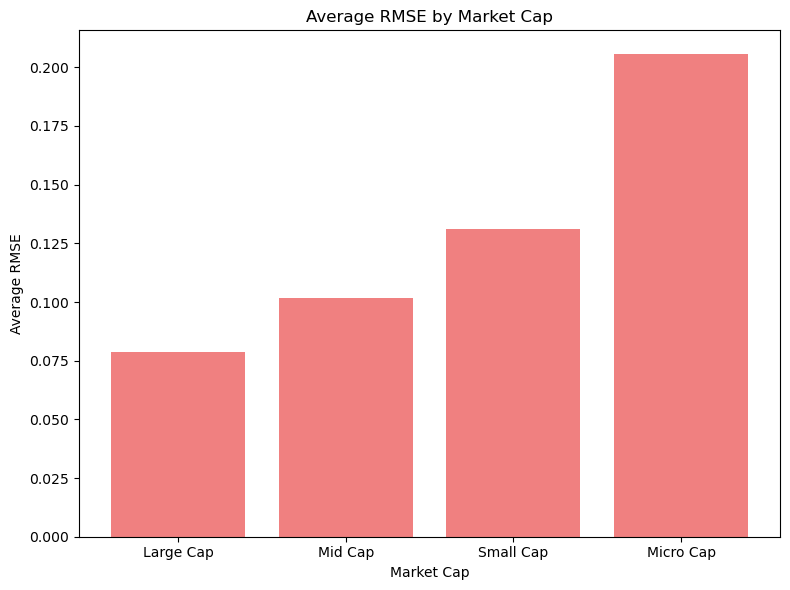

In [215]:
# Plot the average volatility by market cap
plt.figure(figsize=(8, 6))
plt.bar(avg_vol_market_cap_df['Market Cap'], avg_vol_market_cap_df['Average Volatility'], color='lightgreen')
plt.xlabel('Market Cap')
plt.ylabel('Average Volatility')
plt.title('Average Volatility by Market Cap')
plt.tight_layout()
plt.show()

# Plot the average RMSE by market cap
plt.figure(figsize=(8, 6))
plt.bar(avg_rmse_market_cap_df['Market Cap'], avg_rmse_market_cap_df['Average RMSE'], color='lightcoral')
plt.xlabel('Market Cap')
plt.ylabel('Average RMSE')
plt.title('Average RMSE by Market Cap')
plt.tight_layout()
plt.show()